In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load JSON file into DataFrame
with open("out-eval.json", "r") as file:
    data = json.load(file)

# Flatten the "scoring" dictionary into separate columns
df = pd.json_normalize(data)
df

,text,annotator_topics,generated_topics,scoring.ce_scores_1to1,scoring.ce_scores
0,"<b>Italie, jmenovitě severní, má od dob Karla...","[mezistátní vztahy, malířske bratstvo]","[mezistátní vztahy, malířské bratrstvo]","[[{'from': 'mezistátní vztahy', 'to': 'mezistá...",[{'from': 'mezistátní vztahy malířské bratrstv...
1,"<b>Chce-li poznačiti nástroj, ukazuje na domn...","[nakládání s nástroji, pohyby s nástroji]","[nakládání s nástroji, pohyby s nástroji]","[[{'from': 'nakládání s nástroji', 'to': 'nakl...",[{'from': 'nakládání s nástroji pohyby s nástr...
2,<b>Při sázení některých složitějších prací je...,"[typografie, grafický design, sazba textu, pří...","[sazební proces, vizuální plánování, akcidenčn...","[[{'from': 'typografie', 'to': 'sazební proces...",[{'from': 'sazební proces vizuální plánování a...
3,"<b>Začali večeřeti, ale nedali tomu mnoho. Mí...","[jedení, večeření]","[nedostatečná chuť k jídlu, večeře, vymlouvání...","[[{'from': 'jedení', 'to': 'nedostatečná chuť ...",[{'from': 'nedostatečná chuť k jídlu večeře vy...
4,<b>Letha od narození Syna božího tisíczeho pě...,"[uzavírání smlouv, pracovní smlouva]","[smlouva mezi řemeslníky, oděvní odměna, histo...","[[{'from': 'uzavírání smlouv', 'to': 'smlouva ...",[{'from': 'smlouva mezi řemeslníky oděvní odmě...
...,...,...,...,...,...
188,<b>V druhé polovině říše tato politika zájmov...,"[politika v období druhé poloviny říše, Zmatky...","[politika říše, příčiny zmatků, nerozřešitelné...",[[{'from': 'politika v období druhé poloviny ř...,[{'from': 'politika říše příčiny zmatků nerozř...
189,"<b>šťuji, že ze všech lidí, kteří Vám přejí d...","[lidé přející druhým lidem dobré věci, nesobec...","[oddanost sluhy, přání dobra, věrnost P. B. Sh...",[[{'from': 'lidé přející druhým lidem dobré vě...,[{'from': 'oddanost sluhy přání dobra věrnost ...
190,<b>Pestrými okny s nádhernými malbami padalo ...,[článek o světle pronikajícím do budovy barevn...,"[barevné světlo, nádherné malby, obloukovky]",[[{'from': 'článek o světle pronikajícím do bu...,[{'from': 'barevné světlo nádherné malby oblou...
191,"<b>Proto po zprávě, kterou o věci podala komi...","[Vláda na našem území ve 14. století, předání ...","[církevní reformy, vznik metropolitního stolce...",[[{'from': 'Vláda na našem území ve 14. stolet...,[{'from': 'církevní reformy vznik metropolitní...


In [3]:
df["topics_len"] = df["annotator_topics"].apply(lambda x: len(x))
df_clean = df.query("topics_len != 0")
df_clean

,text,annotator_topics,generated_topics,scoring.ce_scores_1to1,scoring.ce_scores,topics_len
0,"<b>Italie, jmenovitě severní, má od dob Karla...","[mezistátní vztahy, malířske bratstvo]","[mezistátní vztahy, malířské bratrstvo]","[[{'from': 'mezistátní vztahy', 'to': 'mezistá...",[{'from': 'mezistátní vztahy malířské bratrstv...,2
1,"<b>Chce-li poznačiti nástroj, ukazuje na domn...","[nakládání s nástroji, pohyby s nástroji]","[nakládání s nástroji, pohyby s nástroji]","[[{'from': 'nakládání s nástroji', 'to': 'nakl...",[{'from': 'nakládání s nástroji pohyby s nástr...,2
2,<b>Při sázení některých složitějších prací je...,"[typografie, grafický design, sazba textu, pří...","[sazební proces, vizuální plánování, akcidenčn...","[[{'from': 'typografie', 'to': 'sazební proces...",[{'from': 'sazební proces vizuální plánování a...,4
3,"<b>Začali večeřeti, ale nedali tomu mnoho. Mí...","[jedení, večeření]","[nedostatečná chuť k jídlu, večeře, vymlouvání...","[[{'from': 'jedení', 'to': 'nedostatečná chuť ...",[{'from': 'nedostatečná chuť k jídlu večeře vy...,2
4,<b>Letha od narození Syna božího tisíczeho pě...,"[uzavírání smlouv, pracovní smlouva]","[smlouva mezi řemeslníky, oděvní odměna, histo...","[[{'from': 'uzavírání smlouv', 'to': 'smlouva ...",[{'from': 'smlouva mezi řemeslníky oděvní odmě...,2
...,...,...,...,...,...,...
188,<b>V druhé polovině říše tato politika zájmov...,"[politika v období druhé poloviny říše, Zmatky...","[politika říše, příčiny zmatků, nerozřešitelné...",[[{'from': 'politika v období druhé poloviny ř...,[{'from': 'politika říše příčiny zmatků nerozř...,4
189,"<b>šťuji, že ze všech lidí, kteří Vám přejí d...","[lidé přející druhým lidem dobré věci, nesobec...","[oddanost sluhy, přání dobra, věrnost P. B. Sh...",[[{'from': 'lidé přející druhým lidem dobré vě...,[{'from': 'oddanost sluhy přání dobra věrnost ...,3
190,<b>Pestrými okny s nádhernými malbami padalo ...,[článek o světle pronikajícím do budovy barevn...,"[barevné světlo, nádherné malby, obloukovky]",[[{'from': 'článek o světle pronikajícím do bu...,[{'from': 'barevné světlo nádherné malby oblou...,4
191,"<b>Proto po zprávě, kterou o věci podala komi...","[Vláda na našem území ve 14. století, předání ...","[církevní reformy, vznik metropolitního stolce...",[[{'from': 'Vláda na našem území ve 14. stolet...,[{'from': 'církevní reformy vznik metropolitní...,2


In [5]:
def get_fce_score(scoring, fce):
    score_values = pd.Series(scoring).apply(lambda x: x["score"])
    return fce(score_values)

df_clean["ce_scoring_min"] = df_clean["scoring.ce_scores"].apply(lambda x: get_fce_score(x, np.min))
df_clean["ce_scoring_max"] = df_clean["scoring.ce_scores"].apply(lambda x: get_fce_score(x, np.max))

def get_fce_score_1to1(scoring, fce):
    score_values = pd.Series(scoring).apply(lambda x: get_fce_score(x, np.max))
    return fce(score_values)

df_clean["ce_scoring_max_1to1"] = df_clean["scoring.ce_scores_1to1"].apply(lambda x: get_fce_score_1to1(x, np.max))
df_clean["ce_scoring_min_1to1"] = df_clean["scoring.ce_scores_1to1"].apply(lambda x: get_fce_score_1to1(x, np.min))
df_clean["ce_scoring_min_sum"] = df_clean["ce_scoring_min_1to1"] + df_clean["ce_scoring_min"]
df_clean

KeyboardInterrupt: 

(array([[91., 18., 14.,  7., 10.,  8.,  7., 18., 12.,  8.],
        [87., 18., 11.,  4., 16.,  6., 12., 12., 16., 11.]]),
 array([0.02345426, 0.11827521, 0.21309617, 0.30791713, 0.40273809,
        0.49755904, 0.59238   , 0.68720096, 0.78202192, 0.87684288,
        0.97166383]),
 <a list of 2 BarContainer objects>)

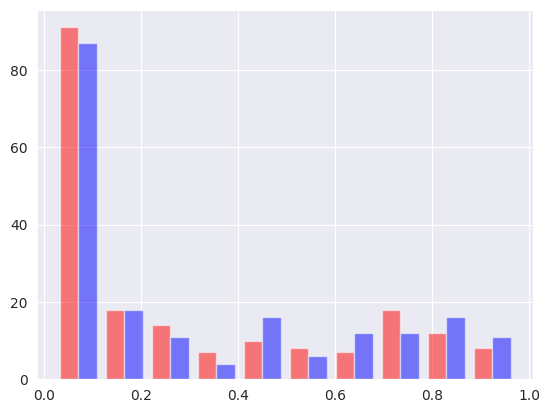

In [11]:

plt.hist([df_clean["ce_scoring_min"], df_clean["ce_scoring_min_1to1"]], color=['r','b'], alpha=0.5)

(array([[36., 16.,  8., 14., 14., 22., 21., 27., 18., 17.],
        [28., 17., 15.,  3., 14., 11., 24., 26., 26., 29.]]),
 array([0.02604336, 0.12065397, 0.21526457, 0.30987517, 0.40448577,
        0.49909637, 0.59370697, 0.68831757, 0.78292817, 0.87753877,
        0.97214937]),
 <a list of 2 BarContainer objects>)

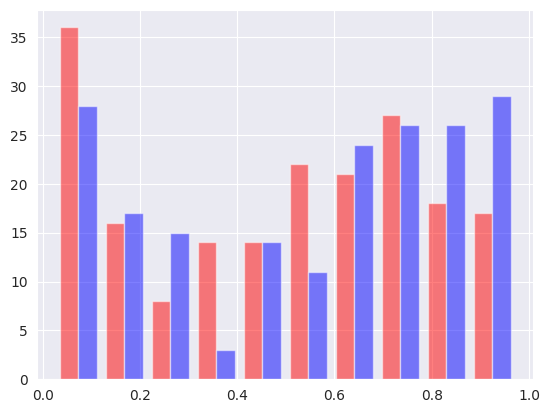

In [16]:
plt.hist([df_clean["ce_scoring_max"], df_clean["ce_scoring_max_1to1"]], color=['r','b'], alpha=0.5)


In [14]:
df_metrics =  df_clean[["ce_scoring_min", "ce_scoring_min_1to1", "ce_scoring_max", "ce_scoring_max_1to1"]]
df_metrics.corr()

,ce_scoring_min,ce_scoring_min_1to1,ce_scoring_max,ce_scoring_max_1to1
ce_scoring_min,1.000000,0.919069,0.659072,0.483522
ce_scoring_min_1to1,0.919069,1.000000,0.618891,0.562223
ce_scoring_max,0.659072,0.618891,1.000000,0.871440
ce_scoring_max_1to1,0.483522,0.562223,0.871440,1.000000


<Axes: xlabel='ce_scoring_min', ylabel='ce_scoring_min_1to1'>

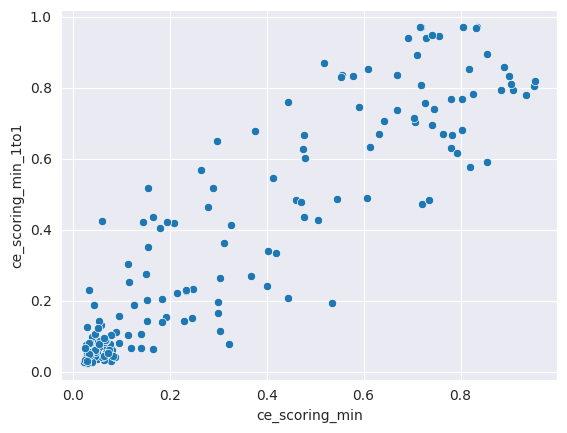

In [15]:
sns.scatterplot(x=df_metrics["ce_scoring_min"], y=df_metrics["ce_scoring_min_1to1"] )